In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error

Reading the Annotated Data

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/srhr17/Machine-Learning-Neural-Network-Assignment/main/CollectedData_annotation.csv',index_col=0)

In [3]:
df.head()

,Unnamed: 1,Unnamed: 2,annotation,annotation.1,annotation.2,annotation.3,annotation.4,annotation.5,annotation.6,annotation.7,...,annotation.26,annotation.27,annotation.28,annotation.29,annotation.30,annotation.31,annotation.32,annotation.33,annotation.34,annotation.35
scorer,,,,,,,,,,,,,,,,,,,,,
individuals,NaN,NaN,mouse1,mouse1,mouse1,mouse1,mouse1,mouse1,mouse1,mouse1,...,mouse2,mouse2,mouse2,mouse2,mouse2,mouse2,mouse2,mouse2,mouse2,mouse2
bodyparts,NaN,NaN,topleft,topleft,rightdown,rightdown,nose,nose,leftear,leftear,...,rightear,rightear,leftHip,leftHip,rightHip,rightHip,tailBase,tailBase,tailEnd,tailEnd
coords,NaN,NaN,x,y,x,y,x,y,x,y,...,x,y,x,y,x,y,x,y,x,y
labeled-data,85.0,A_male_in_a_new_cage_face_view_3_2022-08-10_15...,235.0087604175184,187.39317491121764,481.7713439540003,315.30222050581585,418.38279038499576,211.16388249959422,399.13983662297653,211.16388249959422,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
labeled-data,85.0,A_male_in_a_new_cage_face_view_3_2022-08-10_15...,234.60483979437058,204.14698358385942,457.6013604657909,307.42958263167503,439.6051500256412,300.3875872420512,455.25402866924964,232.31496514235448,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Preprocessing the data

In [4]:
df.columns=list(df.iloc[0,:]+"_"+df.iloc[1,:]+"_"+df.iloc[2,:])
dfName=df.iloc[:,:2]
df=df.iloc[3:,2:]

In [5]:
df.head()

,mouse1_topleft_x,mouse1_topleft_y,mouse1_rightdown_x,mouse1_rightdown_y,mouse1_nose_x,mouse1_nose_y,mouse1_leftear_x,mouse1_leftear_y,mouse1_rightear_x,mouse1_rightear_y,...,mouse2_rightear_x,mouse2_rightear_y,mouse2_leftHip_x,mouse2_leftHip_y,mouse2_rightHip_x,mouse2_rightHip_y,mouse2_tailBase_x,mouse2_tailBase_y,mouse2_tailEnd_x,mouse2_tailEnd_y
scorer,,,,,,,,,,,,,,,,,,,,,
labeled-data,235.0087604175184,187.39317491121764,481.7713439540003,315.30222050581585,418.38279038499576,211.16388249959422,399.13983662297653,211.16388249959422,445.54931334314057,206.6361286732367,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
labeled-data,234.60483979437058,204.14698358385942,457.6013604657909,307.42958263167503,439.6051500256412,300.3875872420512,455.25402866924964,232.31496514235448,413.7845002636873,241.70429232851956,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
labeled-data,225.2155126082055,80.5208422993527,288.5934711148197,222.92563795618952,249.4712745057986,100.86438453604367,240.0819473196335,85.99794982461566,261.2079334885049,88.34528162115691,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
labeled-data,315.97900874113446,182.23855348280756,387.9638505017333,244.83406805724127,384.0516308408312,204.92942751603977,362.92564467195984,188.49810494025093,377.79207938338783,190.06299280461172,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
labeled-data,146.97111939016332,216.6660864987462,362.1432007397794,330.90290059708775,164.1848858981326,223.70808188837003,192.3528674566278,217.4485304309266,193.1353113888082,216.6660864987462,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
print(df.columns)

Index(['mouse1_topleft_x', 'mouse1_topleft_y', 'mouse1_rightdown_x',
       'mouse1_rightdown_y', 'mouse1_nose_x', 'mouse1_nose_y',
       'mouse1_leftear_x', 'mouse1_leftear_y', 'mouse1_rightear_x',
       'mouse1_rightear_y', 'mouse1_leftHip_x', 'mouse1_leftHip_y',
       'mouse1_rightHip_x', 'mouse1_rightHip_y', 'mouse1_tailBase_x',
       'mouse1_tailBase_y', 'mouse1_tailEnd_x', 'mouse1_tailEnd_y',
       'mouse2_topleft_x', 'mouse2_topleft_y', 'mouse2_rightdown_x',
       'mouse2_rightdown_y', 'mouse2_nose_x', 'mouse2_nose_y',
       'mouse2_leftear_x', 'mouse2_leftear_y', 'mouse2_rightear_x',
       'mouse2_rightear_y', 'mouse2_leftHip_x', 'mouse2_leftHip_y',
       'mouse2_rightHip_x', 'mouse2_rightHip_y', 'mouse2_tailBase_x',
       'mouse2_tailBase_y', 'mouse2_tailEnd_x', 'mouse2_tailEnd_y'],
      dtype='object')


In [7]:
col_names=['mouse_topleft_x', 'mouse_topleft_y', 'mouse_rightdown_x',
       'mouse_rightdown_y', 'mouse_nose_x', 'mouse_nose_y',
       'mouse_leftear_x', 'mouse_leftear_y', 'mouse_rightear_x',
       'mouse_rightear_y', 'mouse_leftHip_x', 'mouse_leftHip_y',
       'mouse_rightHip_x', 'mouse_rightHip_y', 'mouse_tailBase_x',
       'mouse_tailBase_y', 'mouse_tailEnd_x', 'mouse_tailEnd_y']
mouse1=df.iloc[:,:18]
mouse1.columns=col_names
mouse2=df.iloc[:,18:]
mouse2.columns=col_names
mouse=pd.concat([mouse1,mouse2])

In [8]:
mouse.head()

,mouse_topleft_x,mouse_topleft_y,mouse_rightdown_x,mouse_rightdown_y,mouse_nose_x,mouse_nose_y,mouse_leftear_x,mouse_leftear_y,mouse_rightear_x,mouse_rightear_y,mouse_leftHip_x,mouse_leftHip_y,mouse_rightHip_x,mouse_rightHip_y,mouse_tailBase_x,mouse_tailBase_y,mouse_tailEnd_x,mouse_tailEnd_y
scorer,,,,,,,,,,,,,,,,,,
labeled-data,235.0087604175184,187.39317491121764,481.7713439540003,315.30222050581585,418.38279038499576,211.16388249959422,399.13983662297653,211.16388249959422,445.54931334314057,206.6361286732367,400.27177507956594,292.66345137402857,467.0561440183385,275.684374525188,418.38279038499576,301.7189590267435,251.98783726635892,302.85089748333303
labeled-data,234.60483979437058,204.14698358385942,457.6013604657909,307.42958263167503,439.6051500256412,300.3875872420512,455.25402866924964,232.31496514235448,413.7845002636873,241.70429232851956,384.83407477301165,250.31117558250423,353.53631748579477,259.7005027686693,337.8874388421863,254.2233952434064,245.55905484489648,262.8302784973911
labeled-data,225.2155126082055,80.5208422993527,288.5934711148197,222.92563795618952,249.4712745057986,100.86438453604367,240.0819473196335,85.99794982461566,261.2079334885049,88.34528162115691,233.82239586219015,159.54767944957536,263.5552652850462,153.28812799213193,254.94838203106156,172.84922629664254,285.46369538609804,221.36075009182866
labeled-data,315.97900874113446,182.23855348280756,387.9638505017333,244.83406805724127,384.0516308408312,204.92942751603977,362.92564467195984,188.49810494025093,377.79207938338783,190.06299280461172,323.0210041307583,201.7996517873181,353.53631748579477,218.23097436310695,323.8034480629387,215.8836425665657,328.49811165602125,245.61651198942172
labeled-data,146.97111939016332,216.6660864987462,362.1432007397794,330.90290059708775,164.1848858981326,223.70808188837003,192.3528674566278,217.4485304309266,193.1353113888082,216.6660864987462,224.4330686760251,311.34180229257726,279.9865878608351,273.78449354791695,295.6354665044435,298.82269937769047,359.01342501105773,284.7387085984428


In [9]:
mouse.isna().sum()

mouse_topleft_x      66
mouse_topleft_y      66
mouse_rightdown_x    65
mouse_rightdown_y    65
mouse_nose_x         65
mouse_nose_y         65
mouse_leftear_x      65
mouse_leftear_y      65
mouse_rightear_x     65
mouse_rightear_y     65
mouse_leftHip_x      65
mouse_leftHip_y      65
mouse_rightHip_x     65
mouse_rightHip_y     65
mouse_tailBase_x     66
mouse_tailBase_y     66
mouse_tailEnd_x      68
mouse_tailEnd_y      68
dtype: int64

In [10]:
mouse=mouse.dropna()

In [11]:
mouse.isna().sum()

mouse_topleft_x      0
mouse_topleft_y      0
mouse_rightdown_x    0
mouse_rightdown_y    0
mouse_nose_x         0
mouse_nose_y         0
mouse_leftear_x      0
mouse_leftear_y      0
mouse_rightear_x     0
mouse_rightear_y     0
mouse_leftHip_x      0
mouse_leftHip_y      0
mouse_rightHip_x     0
mouse_rightHip_y     0
mouse_tailBase_x     0
mouse_tailBase_y     0
mouse_tailEnd_x      0
mouse_tailEnd_y      0
dtype: int64

In [12]:
mouse.shape

(171, 18)

In [13]:
for i in mouse.columns:
  mouse[i]=pd.to_numeric(mouse[i])

In [14]:
mouse['location_x']=(mouse['mouse_rightdown_x']+mouse['mouse_topleft_x'])/2
mouse['location_y']=(mouse['mouse_rightdown_y']+mouse['mouse_topleft_y'])/2

In [15]:
mouse.drop(columns=['mouse_topleft_x', 'mouse_topleft_y', 'mouse_rightdown_x',
       'mouse_rightdown_y'],axis=1,inplace=True)

In [16]:
mouse.columns

Index(['mouse_nose_x', 'mouse_nose_y', 'mouse_leftear_x', 'mouse_leftear_y',
       'mouse_rightear_x', 'mouse_rightear_y', 'mouse_leftHip_x',
       'mouse_leftHip_y', 'mouse_rightHip_x', 'mouse_rightHip_y',
       'mouse_tailBase_x', 'mouse_tailBase_y', 'mouse_tailEnd_x',
       'mouse_tailEnd_y', 'location_x', 'location_y'],
      dtype='object')

Splitting the data into predictors and response variables

In [17]:
X=mouse.iloc[:,:-2]
Y=mouse.iloc[:,[-2,-1]]

Splitting the data into train and test with a test size of 30%

In [18]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

Building a Sequential Neural Network model with 14 input nodes, 5 hidden layers and 1 output layer with 2 nodes

In [19]:
model=Sequential()
model.add(Dense(16,input_shape=(14,),activation='linear'))
model.add(Dense(32,activation='linear'))
model.add(Dense(64,activation='linear'))
model.add(Dense(128,activation='linear'))
model.add(Dense(64,activation='linear'))
model.add(Dense(32,activation='linear'))
model.add(Dense(16,activation='linear'))
model.add(Dense(2,activation='linear'))

Compiling this model with L2 loss as loss function and evaluation metric

In [20]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])

Training the model

In [21]:
history=model.fit(x_train,y_train,epochs=100,verbose=0,validation_split=0.1)

In [22]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mean_squared_error,val_loss,val_mean_squared_error,epoch
95,82.146584,82.146584,55.081463,55.081463,95
96,82.841232,82.841232,55.152359,55.152359,96
97,85.442192,85.442192,52.525723,52.525723,97
98,89.264038,89.264038,54.587559,54.587559,98
99,86.706757,86.706757,63.463711,63.463711,99


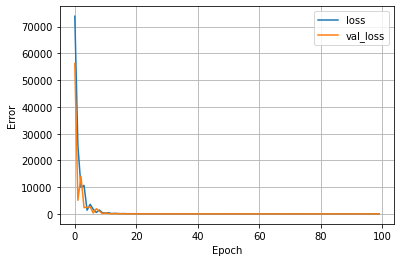

In [23]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend()
plt.grid(True)

Predicting using the unseen data

In [24]:
y_pred=model.predict(x_test)

2/2 [==============================] - 0s 8ms/step


Evaluating our model's predictions

In [25]:
print("R2 SCORE : ",r2_score(y_test,y_pred))

R2 SCORE :  0.9698801333248211


In [26]:
print("MEAN SQUARED ERROR : ",mean_squared_error(y_test,y_pred))

MEAN SQUARED ERROR :  102.10980102213534


Visualizing the actual and predicted location_x,location_y

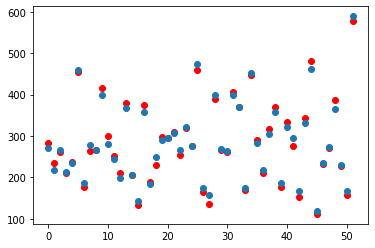

In [27]:
plt.scatter(range(y_test.shape[0]),y_test.iloc[:,0],c="red")
plt.scatter(range(y_test.shape[0]),pd.DataFrame(y_pred).iloc[:,0])

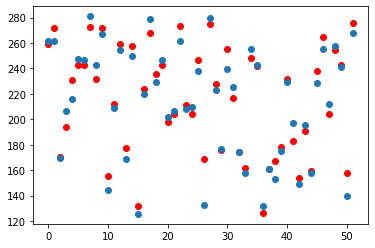

In [28]:
plt.scatter(range(y_test.shape[0]),y_test.iloc[:,1],c="red")
plt.scatter(range(y_test.shape[0]),pd.DataFrame(y_pred).iloc[:,1])

In [29]:
location=pd.DataFrame(y_test)
location['predict_location_x']=[i[0] for i in y_pred]
location['predict_location_y']=[i[1] for i in y_pred]
location.head(10)

,location_x,location_y,predict_location_x,predict_location_y
scorer,,,,
labeled-data,283.116364,258.918059,271.027039,261.254761
labeled-data,234.213618,272.219606,218.314789,261.221222
labeled-data,260.816712,170.110673,265.302734,169.661743
labeled-data,211.522744,193.975212,213.253799,206.525269
labeled-data,236.560950,230.750077,235.113098,216.003983
labeled-data,453.689141,242.486736,459.703491,247.737030
labeled-data,177.095211,242.877958,187.411209,246.610580
labeled-data,264.337709,272.610828,279.230469,281.085541
labeled-data,266.293819,231.923743,266.675995,242.431747


In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                240       
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 64)                2112      
                                                                 
 dense_3 (Dense)             (None, 128)               8320      
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 dense_6 (Dense)             (None, 16)                5